# Data analysis project

1: Understanding the problem and objective(prediction) and bussiness Requirement
 client  <---- Bussiness analyst(domain experst)----requirement of client ---->Data Anlayst or Data Scientist(project begin)

            first DA will ask : Where is data 
            Differnt data scources
            * primary data (open source )
            * secondary database (outside the data) / we can purcase the data from third party data 


after completing 
2: ETL(EXTRACT TRANFORM LOAD)
         TRABSFORMATION DATA : * DATA CLEANING( Bad data(in between other dtype),misalignel data(not same data eg[New York -- NY]),Null                                   Values ,Duplicates ,Outliears ,
                                 # for the bad data and nun values we eleimnate from the drop columns ,delete row,imputation techniqune                                  : measur of central tendency or we create predictive model for (KNN inputater)
                                 
                               * Data Featuring  and  Data Scaling 
                               * OUTLIEAR are which  dosn't lie in the normal data line
                                 detect TECHNICE :
                                UNIVARITE(Box plot) 
                                BI varite 
                                
                              




AFTER DATA READY 
3.1 : EDA (EXPLORATORY DATA ANALYSIS)



       3.2 MODELING THE DATA 


4: AFTER ETL IT WORK CAN BE DATA VISULIZATIONAND FOLLOWED BY CONCLUSION 

# Project overview : Building Regression model to predict the homestay price of Residential Properties 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.style # supoorting library 

from sklearn.linear_model import LinearRegression # model building 
from sklearn import metrics # model evaluation

In [2]:
# importing the data
df=pd.read_excel('Air_BNB.xlsx', engine='openpyxl')

In [3]:
df

id        room_type  accommodates  bathrooms cancellation_policy  \
0       6901257  Entire home/apt           3.0        1.0              strict   
1       6304928  Entire home/apt           7.0        1.0              strict   
2       7919400  Entire home/apt           5.0        1.0            moderate   
3      13418779  Entire home/apt           4.0        1.0            flexible   
4       3808709  Entire home/apt           2.0        1.0            moderate   
...         ...              ...           ...        ...                 ...   
74106  14549287     Private room           1.0        1.0            flexible   
74107  13281809  Entire home/apt           4.0        2.0            moderate   
74108  18688039  Entire home/apt           5.0        1.0            moderate   
74109  17045948  Entire home/apt           2.0        1.0              strict   
74110   3534845  Entire home/apt           4.0        1.0            moderate   

       cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds  \
0               1.0                f                 100.0       1.0   1.0   
1               1.0                t                  93.0       3.0   3.0   
2               1.0                t                  92.0       1.0   3.0   
3               1.0                f                   NaN       2.0   2.0   
4               1.0                t                  40.0       0.0   1.0   
...             ...              ...                   ...       ...   ...   
74106           0.0                f                   NaN       1.0   1.0   
74107           1.0                f                  93.0       2.0   4.0   
74108           1.0                t                  94.0       2.0   2.0   
74109           1.0                t                   NaN       0.0   2.0   
74110           0.0                f                  96.0       1.0   2.0   

       log_price  
0       5.010635  
1       5.129899  
2       4.976734  
3       6.620073  
4       4.744932  
...          ...  
74106   4.605170  
74107   5.043425  
74108   5.220356  
74109   5.273000  
74110   4.852030  

[74111 rows x 11 columns]

In [4]:
df=df.drop('id',axis=1)

In [5]:
df.shape

(74111, 10)

In [6]:
df.head(1)

room_type  accommodates  bathrooms cancellation_policy  cleaning_fee  \
0  Entire home/apt           3.0        1.0              strict           1.0   

  instant_bookable  review_scores_rating  bedrooms  beds  log_price  
0                f                 100.0       1.0   1.0   5.010635

In [7]:
df.tail(1)

room_type  accommodates  bathrooms cancellation_policy  \
74110  Entire home/apt           4.0        1.0            moderate   

       cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds  \
74110           0.0                f                  96.0       1.0   2.0   

       log_price  
74110    4.85203

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  float64
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


In [9]:
round(df.describe(include='all').T,2)

count unique              top   freq     mean       std  \
room_type             74106      3  Entire home/apt  41308      NaN       NaN   
accommodates          74108    NaN              NaN    NaN  3.15512    2.1536   
bathrooms             73908    NaN              NaN    NaN  1.23527  0.582054   
cancellation_policy   74103      3           strict  32500      NaN       NaN   
cleaning_fee          74107    NaN              NaN    NaN  0.73406  0.441835   
instant_bookable      74111      2                f  54660      NaN       NaN   
review_scores_rating  57389    NaN              NaN    NaN  94.0674   7.83656   
bedrooms              74019    NaN              NaN    NaN   1.2658  0.852149   
beds                  73980    NaN              NaN    NaN  1.71087   1.25414   
log_price             74111    NaN              NaN    NaN  4.78207  0.717394   

                      min      25%      50%      75%     max  
room_type             NaN      NaN      NaN      NaN     NaN  
accommodates            1        2        2        4      16  
bathrooms               0        1        1        1       8  
cancellation_policy   NaN      NaN      NaN      NaN     NaN  
cleaning_fee            0        0        1        1       1  
instant_bookable      NaN      NaN      NaN      NaN     NaN  
review_scores_rating   20       92       96      100     100  
bedrooms                0        1        1        1      10  
beds                    0        1        1        2      18  
log_price               0  4.31749  4.70953  5.22036  7.6004

In [10]:
# unique values
df.nunique()

room_type                 3
accommodates             16
bathrooms                17
cancellation_policy       3
cleaning_fee              2
instant_bookable          2
review_scores_rating     54
bedrooms                 11
beds                     18
log_price               767
dtype: int64

In [11]:
for col in df.columns:
    if df[col].dtype == "object":
        print(col.upper(),":",df[col].nunique())
        print()
        print(df[col].value_counts())

ROOM_TYPE : 3

Entire home/apt    41308
Private room       30635
Shared room         2163
Name: room_type, dtype: int64
CANCELLATION_POLICY : 3

strict      32500
flexible    22543
moderate    19060
Name: cancellation_policy, dtype: int64
INSTANT_BOOKABLE : 2

f    54660
t    19451
Name: instant_bookable, dtype: int64


In [12]:
df_2=df.copy()

In [13]:
df_2.drop_duplicates(inplace=True)

In [14]:
df_2

room_type  accommodates  bathrooms cancellation_policy  \
0      Entire home/apt           3.0        1.0              strict   
1      Entire home/apt           7.0        1.0              strict   
2      Entire home/apt           5.0        1.0            moderate   
3      Entire home/apt           4.0        1.0            flexible   
4      Entire home/apt           2.0        1.0            moderate   
...                ...           ...        ...                 ...   
74104  Entire home/apt           2.0        1.0              strict   
74107  Entire home/apt           4.0        2.0            moderate   
74108  Entire home/apt           5.0        1.0            moderate   
74109  Entire home/apt           2.0        1.0              strict   
74110  Entire home/apt           4.0        1.0            moderate   

       cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds  \
0               1.0                f                 100.0       1.0   1.0   
1               1.0                t                  93.0       3.0   3.0   
2               1.0                t                  92.0       1.0   3.0   
3               1.0                f                   NaN       2.0   2.0   
4               1.0                t                  40.0       0.0   1.0   
...             ...              ...                   ...       ...   ...   
74104           1.0                f                 100.0       1.0   1.0   
74107           1.0                f                  93.0       2.0   4.0   
74108           1.0                t                  94.0       2.0   2.0   
74109           1.0                t                   NaN       0.0   2.0   
74110           0.0                f                  96.0       1.0   2.0   

       log_price  
0       5.010635  
1       5.129899  
2       4.976734  
3       6.620073  
4       4.744932  
...          ...  
74104   4.356709  
74107   5.043425  
74108   5.220356  
74109   5.273000  
74110   4.852030  

[54117 rows x 10 columns]

In [15]:
df_2.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

In [16]:
# ONE HOT ENCODING 
df_2=pd.get_dummies(df_2,columns = ["room_type","cancellation_policy","instant_bookable"],drop_first=True)

In [17]:
df_2

accommodates  bathrooms  cleaning_fee  review_scores_rating  bedrooms  \
0               3.0        1.0           1.0                 100.0       1.0   
1               7.0        1.0           1.0                  93.0       3.0   
2               5.0        1.0           1.0                  92.0       1.0   
3               4.0        1.0           1.0                   NaN       2.0   
4               2.0        1.0           1.0                  40.0       0.0   
...             ...        ...           ...                   ...       ...   
74104           2.0        1.0           1.0                 100.0       1.0   
74107           4.0        2.0           1.0                  93.0       2.0   
74108           5.0        1.0           1.0                  94.0       2.0   
74109           2.0        1.0           1.0                   NaN       0.0   
74110           4.0        1.0           0.0                  96.0       1.0   

       beds  log_price  room_type_Private room  room_type_Shared room  \
0       1.0   5.010635                       0                      0   
1       3.0   5.129899                       0                      0   
2       3.0   4.976734                       0                      0   
3       2.0   6.620073                       0                      0   
4       1.0   4.744932                       0                      0   
...     ...        ...                     ...                    ...   
74104   1.0   4.356709                       0                      0   
74107   4.0   5.043425                       0                      0   
74108   2.0   5.220356                       0                      0   
74109   2.0   5.273000                       0                      0   
74110   2.0   4.852030                       0                      0   

       cancellation_policy_moderate  cancellation_policy_strict  \
0                                 0                           1   
1                                 0                           1   
2                                 1                           0   
3                                 0                           0   
4                                 1                           0   
...                             ...                         ...   
74104                             0                           1   
74107                             1                           0   
74108                             1                           0   
74109                             0                           1   
74110                             1                           0   

       instant_bookable_t  
0                       0  
1                       1  
2                       1  
3                       0  
4                       1  
...                   ...  
74104                   0  
74107                   0  
74108                   1  
74109                   1  
74110                   0  

[54117 rows x 12 columns]

In [18]:
df_2.isnull().sum()

accommodates                        3
bathrooms                         195
cleaning_fee                        4
review_scores_rating            10215
bedrooms                           92
beds                              125
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
instant_bookable_t                  0
dtype: int64

 # Null values treatment 
## Imputation By  Measure Central Tendancy

In [19]:
for col in df_2.columns:
    if df_2[col].dtype != 'object':
        median=df_2[col].median()
        df_2[col]=df_2[col].fillna(median)


In [20]:
df_2.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

In [21]:
df_mean=df.copy()

In [22]:

df_mean=pd.get_dummies(df_mean,columns = ["room_type","cancellation_policy","instant_bookable"],drop_first=True)

for col in df_mean.columns:
    if df_mean[col].dtype != 'object':
        mean=df_mean[col].mean()
        df_mean[col]=df_mean[col].fillna(mean)


In [23]:
df_mean.isnull().sum()

accommodates                    0
bathrooms                       0
cleaning_fee                    0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
instant_bookable_t              0
dtype: int64

# Predictive model imputation 

In [24]:

df_knn=pd.get_dummies(df,columns = ["room_type","cancellation_policy","instant_bookable"],drop_first=True)

from sklearn.impute import KNNImputer
Imputer=KNNImputer(n_neighbors=5)
df_imputer=Imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(data=df_imputer,columns=df_knn.columns)

In [25]:
df_knn

accommodates  bathrooms  cleaning_fee  review_scores_rating  bedrooms  \
0               3.0        1.0           1.0                 100.0       1.0   
1               7.0        1.0           1.0                  93.0       3.0   
2               5.0        1.0           1.0                  92.0       1.0   
3               4.0        1.0           1.0                  93.2       2.0   
4               2.0        1.0           1.0                  40.0       0.0   
...             ...        ...           ...                   ...       ...   
74106           1.0        1.0           0.0                  93.4       1.0   
74107           4.0        2.0           1.0                  93.0       2.0   
74108           5.0        1.0           1.0                  94.0       2.0   
74109           2.0        1.0           1.0                  96.6       0.0   
74110           4.0        1.0           0.0                  96.0       1.0   

       beds  log_price  room_type_Private room  room_type_Shared room  \
0       1.0   5.010635                     0.0                    0.0   
1       3.0   5.129899                     0.0                    0.0   
2       3.0   4.976734                     0.0                    0.0   
3       2.0   6.620073                     0.0                    0.0   
4       1.0   4.744932                     0.0                    0.0   
...     ...        ...                     ...                    ...   
74106   1.0   4.605170                     1.0                    0.0   
74107   4.0   5.043425                     0.0                    0.0   
74108   2.0   5.220356                     0.0                    0.0   
74109   2.0   5.273000                     0.0                    0.0   
74110   2.0   4.852030                     0.0                    0.0   

       cancellation_policy_moderate  cancellation_policy_strict  \
0                               0.0                         1.0   
1                               0.0                         1.0   
2                               1.0                         0.0   
3                               0.0                         0.0   
4                               1.0                         0.0   
...                             ...                         ...   
74106                           0.0                         0.0   
74107                           1.0                         0.0   
74108                           1.0                         0.0   
74109                           0.0                         1.0   
74110                           1.0                         0.0   

       instant_bookable_t  
0                     0.0  
1                     1.0  
2                     1.0  
3                     0.0  
4                     1.0  
...                   ...  
74106                 0.0  
74107                 0.0  
74108                 1.0  
74109                 1.0  
74110                 0.0  

[74111 rows x 12 columns]

# OUTLIEAR TREATMENT 

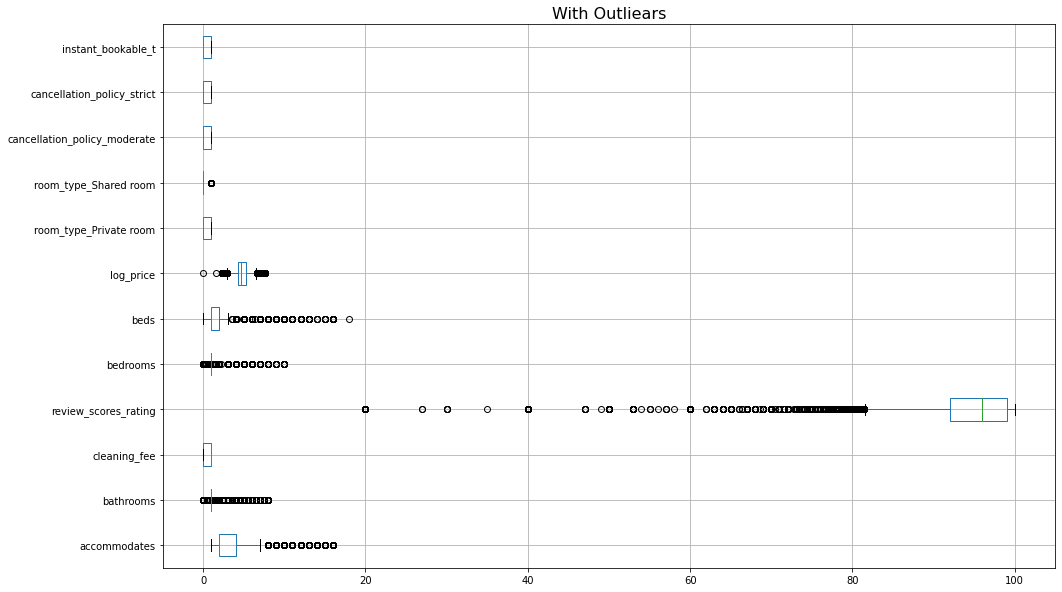

In [26]:
cont=df_knn.dtypes[(df_knn.dtypes !='uint8') & (df_knn.dtypes!='bool')].index
plt.figure(figsize=(16,10))
df_knn[cont].boxplot(vert=0)
plt.title("With Outliears", fontsize=16)
plt.show()

In [29]:
def remove_outliear(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range=Q1-(1.5* IQR)
    upper_range=Q3+(1.5 * IQR)
    return lower_range,upper_range

In [30]:
remove_outliear(df_mean["review_scores_rating"])

(84.0, 108.0)

In [31]:
#copying the dataframe for treatmenting the outliear 
df_mean_out =df_mean.copy()
df_med_out =df_2.copy()
df_knn_out =df_knn.copy()

# Mean Without Outliear dataset use 

In [35]:
for column in df_mean_out.columns:  # loop for columns
    lr,ur=remove_outliear(df_mean_out[column])   #function call 
    df_mean_out[column]=np.where(df_mean_out[column]>ur,ur,df_mean_out[column])  # where (condition(where values is ggreater,  if replace, else )
    df_mean_out[column]=np.where(df_mean_out[column]<lr,lr,df_mean_out[column])

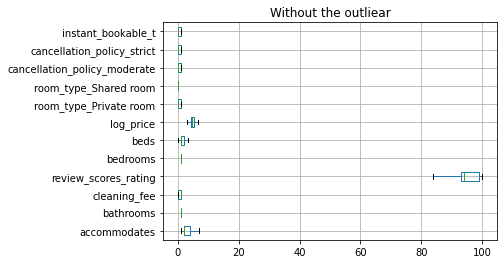

In [39]:
# for mean impute dataset 
df_mean_out.boxplot(vert=0)
plt.title("Without the outliear")
plt.show()

# Data Distribution 

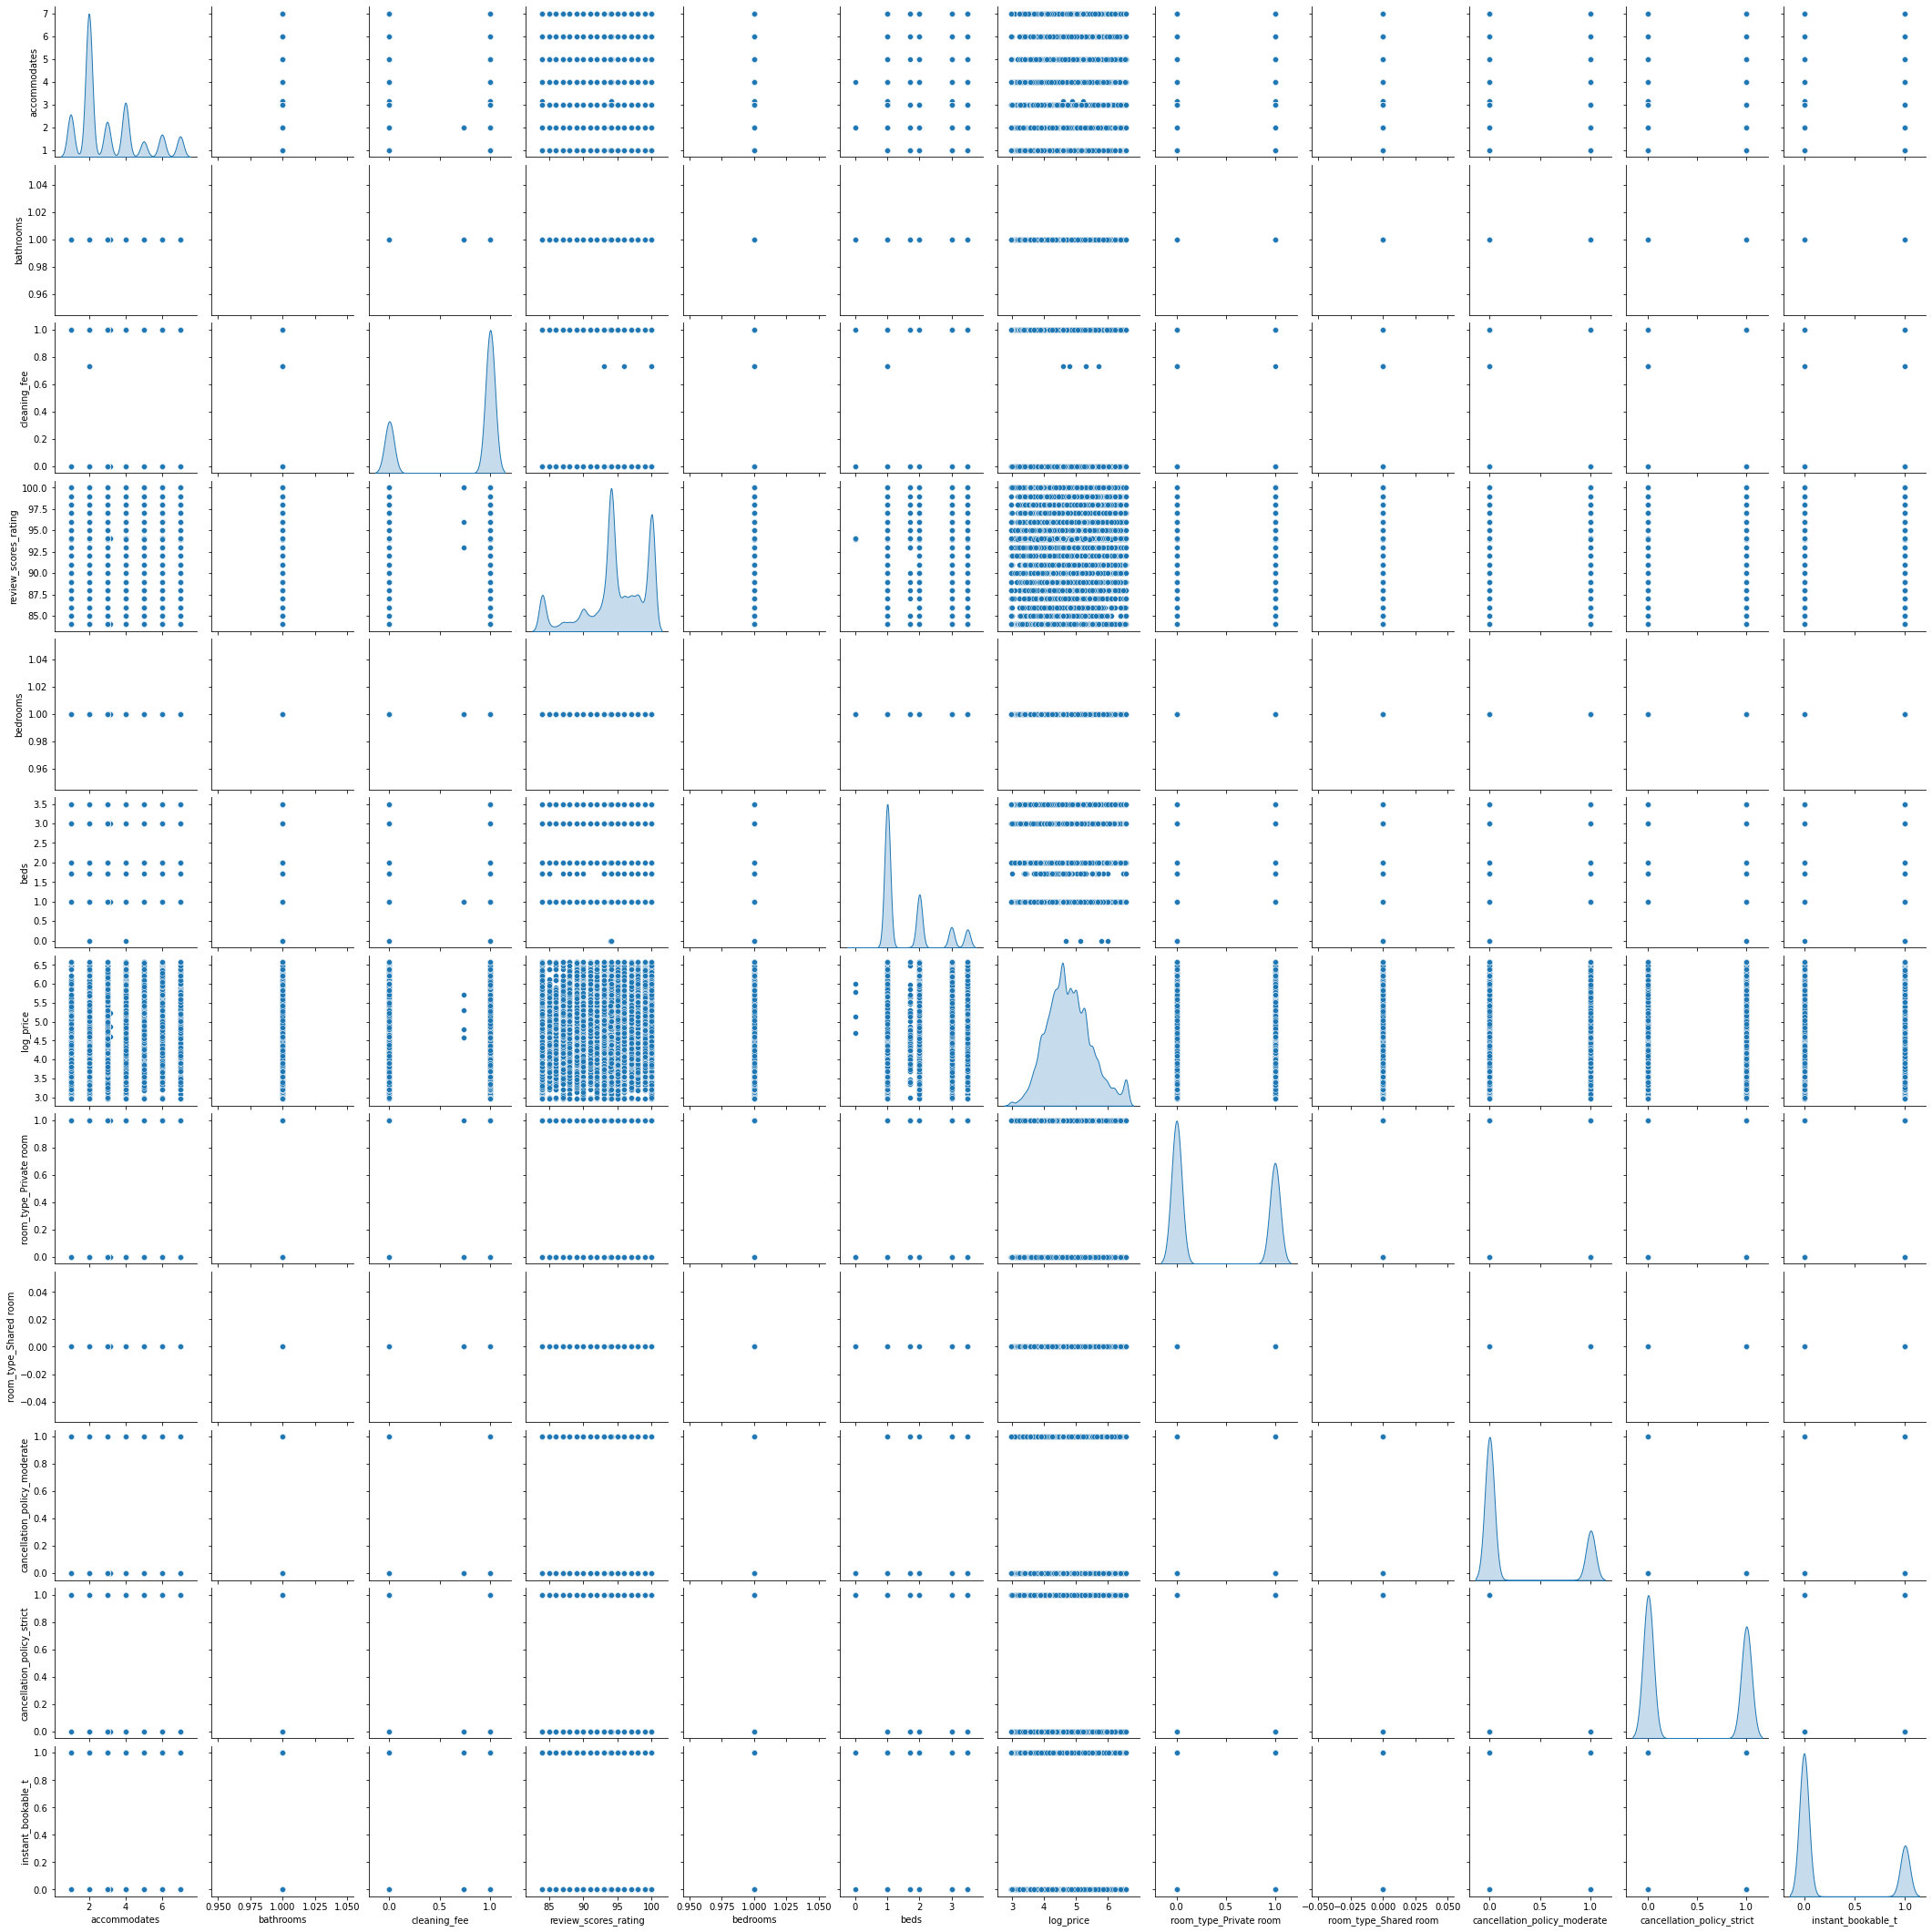

In [41]:
sns.pairplot(df_mean_out,diag_kind='kde')
plt.show()

In [42]:
# correlattion and cofficent realtion of the variable 


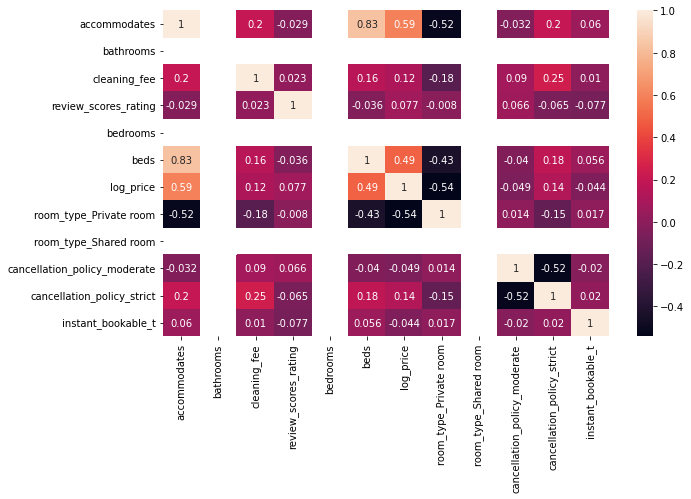

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(df_mean_out.corr(),annot=True)
plt.show()


# Train Test Split

In [66]:
X_mean_out=df_mean_out.drop("log_price",axis=1)
Y_mean_out=df_mean_out["log_price"]

In [62]:
X_mean_out.head()

accommodates  bathrooms  cleaning_fee  review_scores_rating  bedrooms  \
0           3.0        1.0           1.0            100.000000       1.0   
1           7.0        1.0           1.0             93.000000       1.0   
2           5.0        1.0           1.0             92.000000       1.0   
3           4.0        1.0           1.0             94.067365       1.0   
4           2.0        1.0           1.0             84.000000       1.0   

   beds  room_type_Private room  room_type_Shared room  \
0   1.0                     0.0                    0.0   
1   3.0                     0.0                    0.0   
2   3.0                     0.0                    0.0   
3   2.0                     0.0                    0.0   
4   1.0                     0.0                    0.0   

   cancellation_policy_moderate  cancellation_policy_strict  \
0                           0.0                         1.0   
1                           0.0                         1.0   
2                           1.0                         0.0   
3                           0.0                         0.0   
4                           1.0                         0.0   

   instant_bookable_t  
0                 0.0  
1                 1.0  
2                 1.0  
3                 0.0  
4                 1.0

In [67]:
Y_mean_out.head()

0    5.010635
1    5.129899
2    4.976734
3    6.574657
4    4.744932
Name: log_price, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X_mean_out,Y_mean_out, test_size=0.2,random_state=1)

In [70]:
LR=LinearRegression()
model=LR.fit(X_train,Y_train)
model

LinearRegression()

# Model score with removing the outliear has the 44%

In [82]:
round((model.score(X_train,Y_train))*100,2)

41.3

# Mean  with outliear

In [81]:
X_mean=df_mean.drop("log_price",axis=1)
Y_mean=df_mean["log_price"]


X_train,x_test,Y_train,y_test=train_test_split(X_mean,Y_mean, test_size=0.2,random_state=1)

LR=LinearRegression()
model2=LR.fit(X_train,Y_train)



round((model2.score(X_train,Y_train))*100,2)

51.74

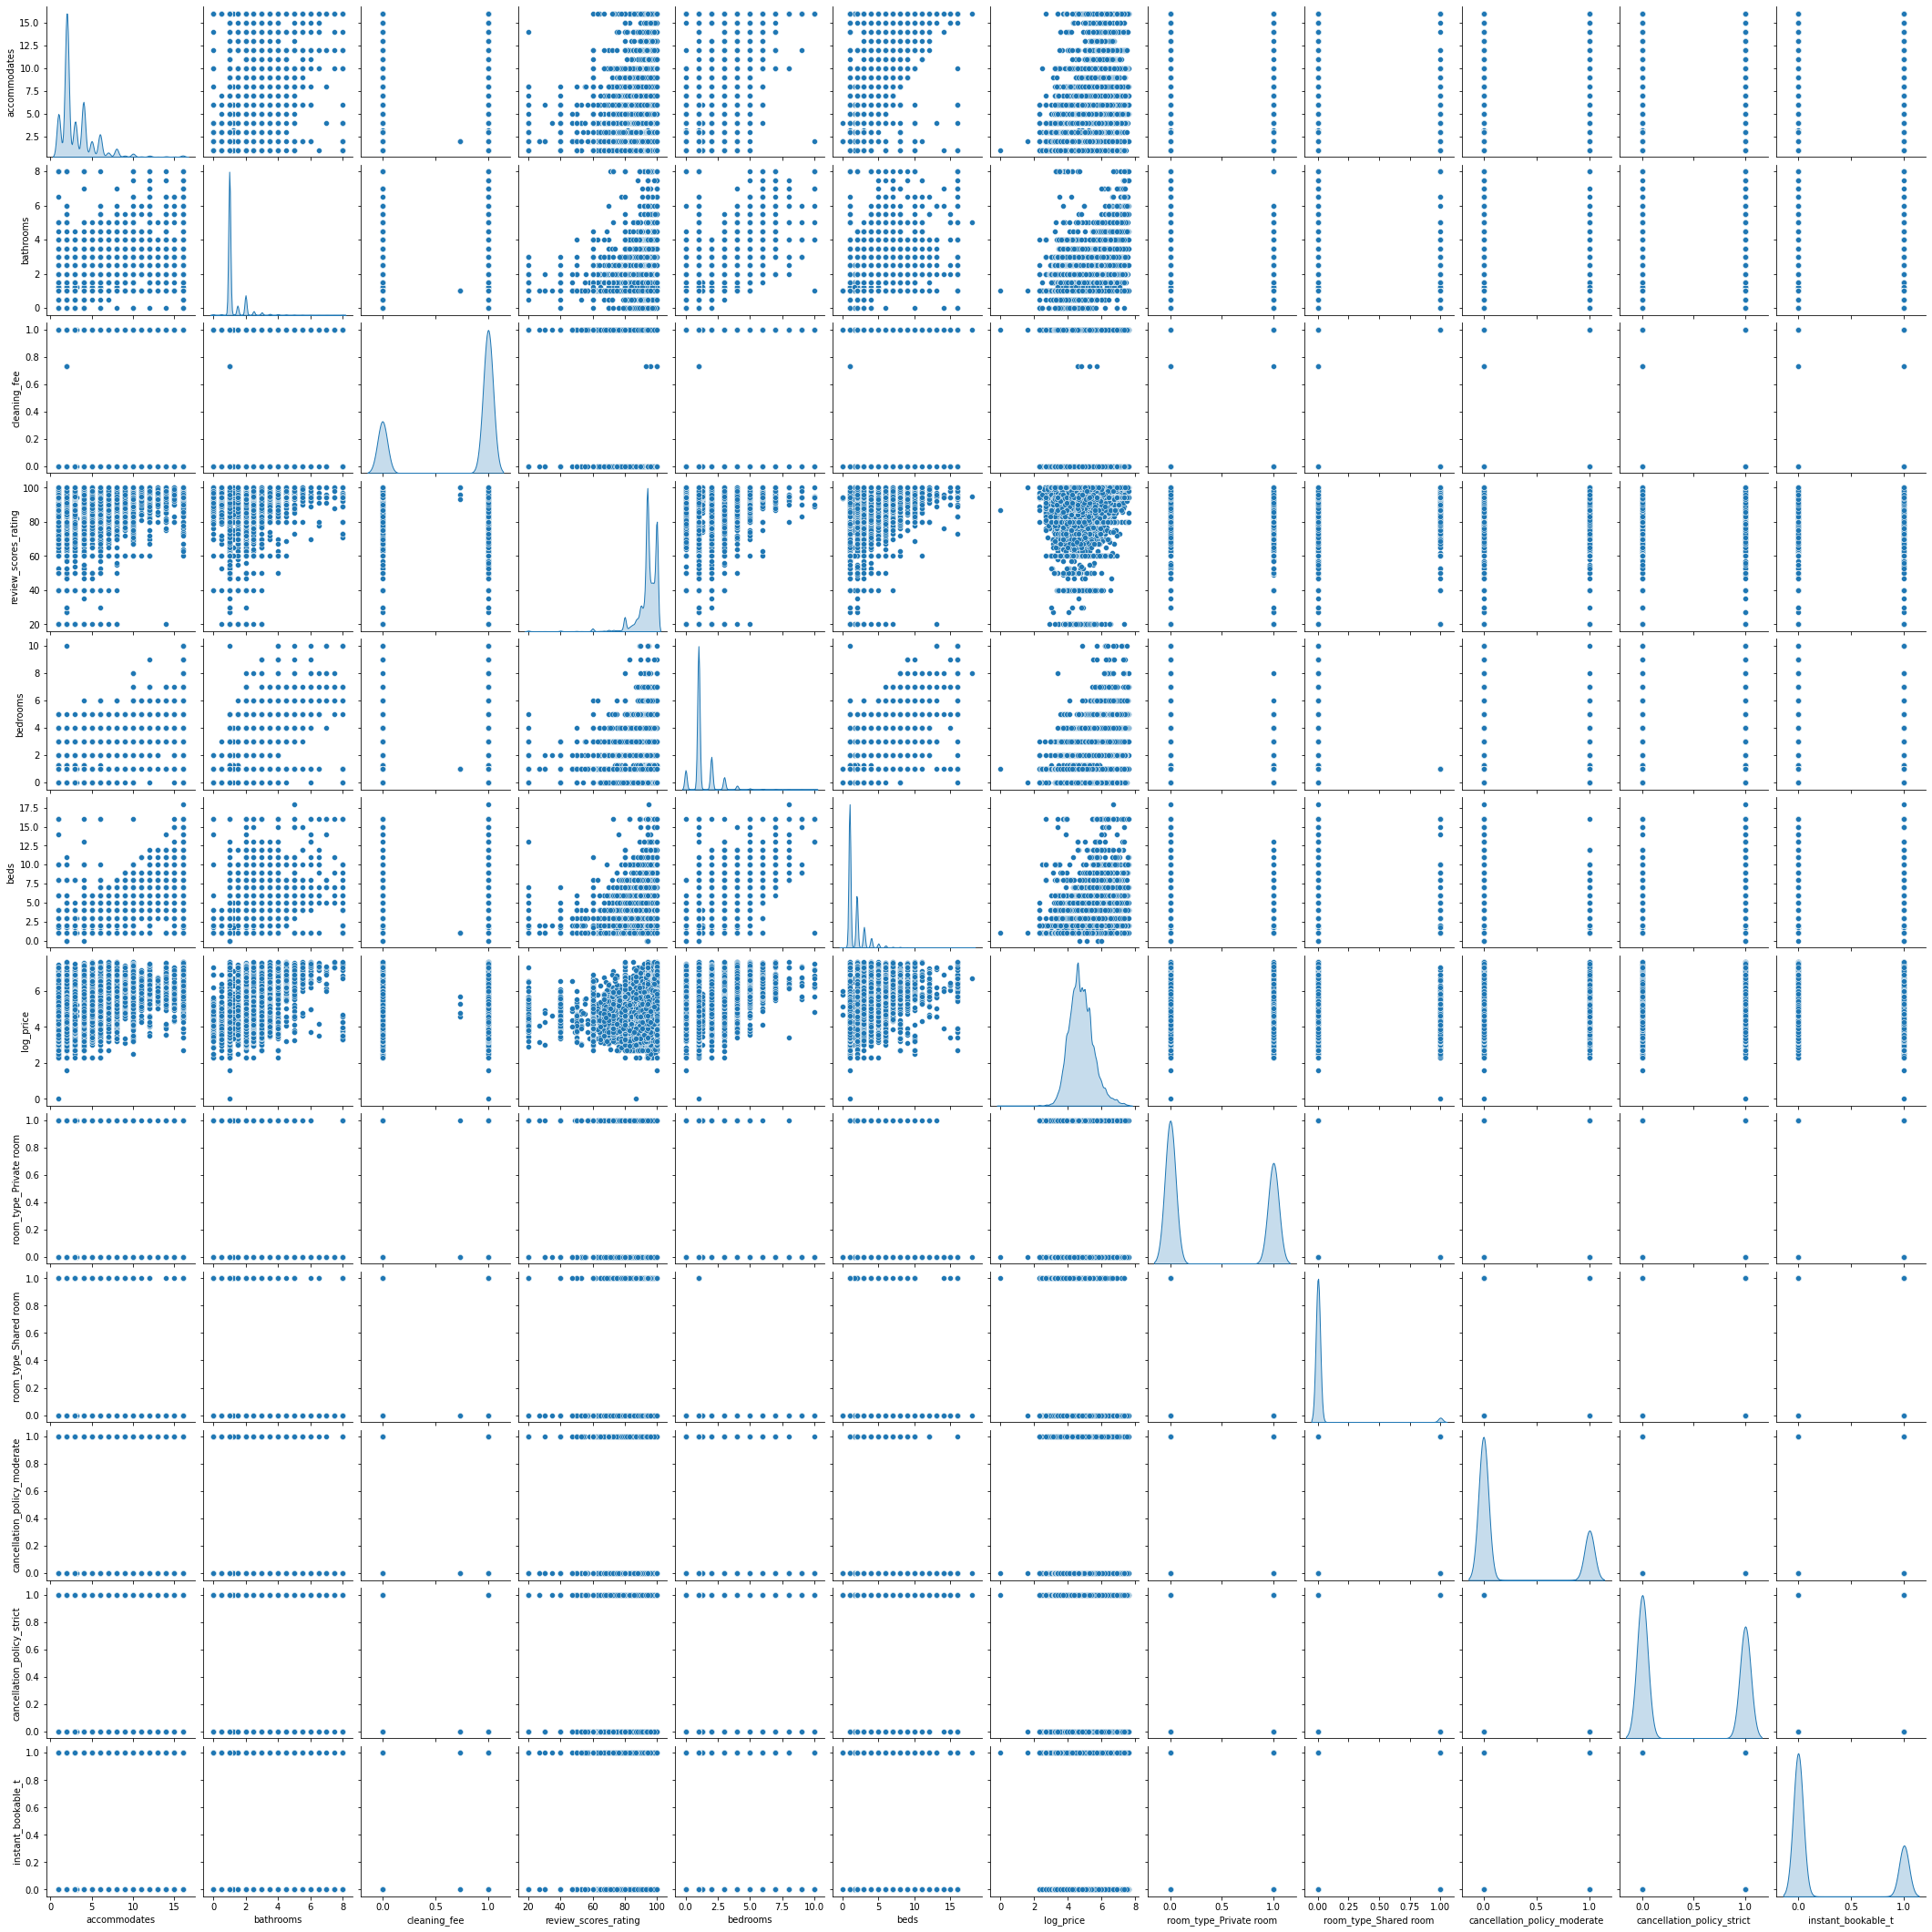

In [88]:
sns.pairplot(df_mean,diag_kind='kde')
plt.show()

<AxesSubplot:>

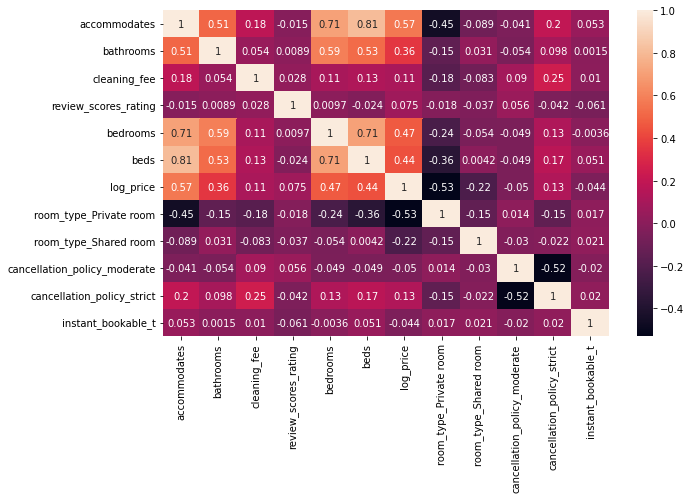

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(df_mean.corr(),annot=True)


# Medien without Outliear

In [40]:
# Treating the meadian imputate outliear
for column in df_med_out.columns:  # loop for columns
    lr,ur=remove_outliear(df_med_out[column])   #function call 
    df_med_out[column]=np.where(df_med_out[column]>ur,ur,df_med_out[column])  # where (condition(where values is ggreater,  if replace, else )
    df_med_out[column]=np.where(df_med_out[column]<lr,lr,df_med_out[column])

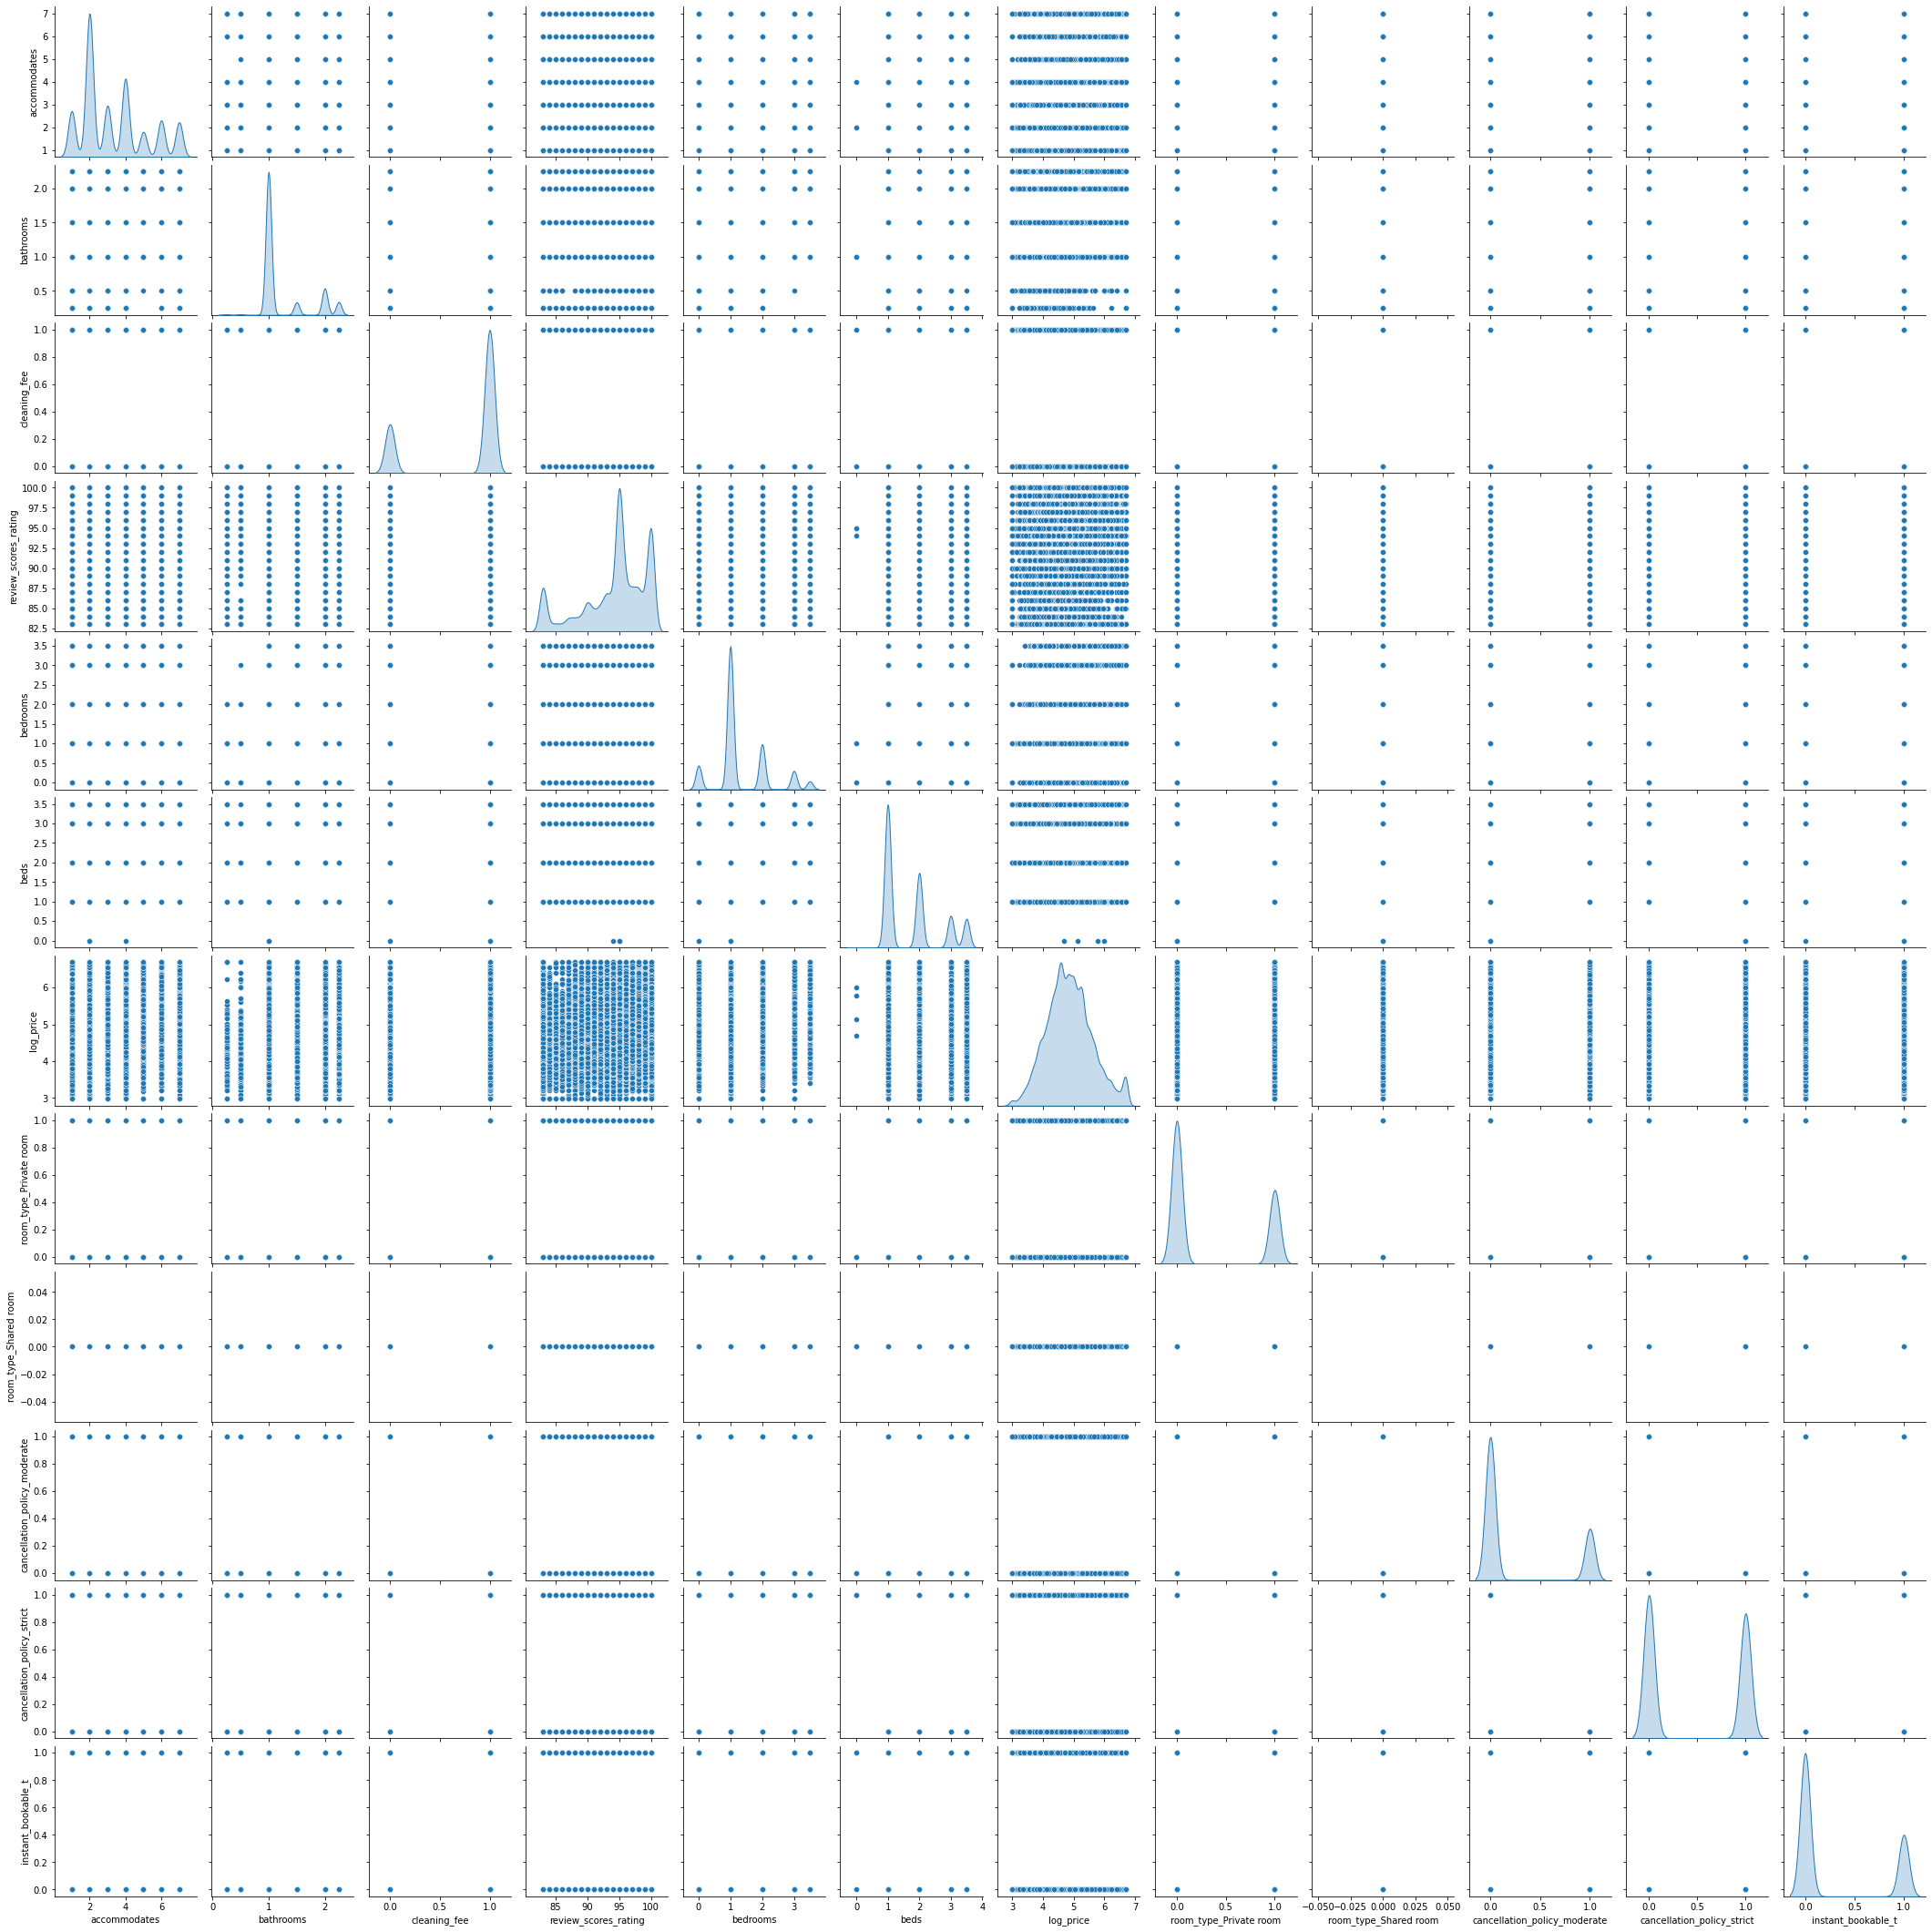

In [93]:
sns.pairplot(df_med_out,diag_kind='kde')
plt.show()

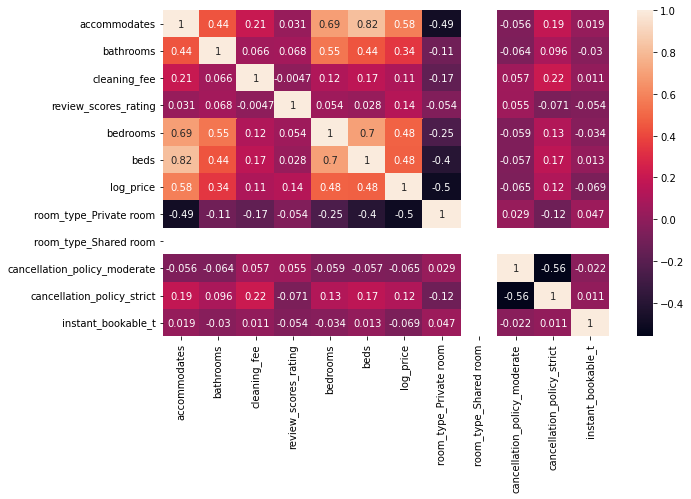

In [95]:
plt.figure(figsize=(10,6))
sns.heatmap(df_med_out.corr(),annot=True)
plt.show()

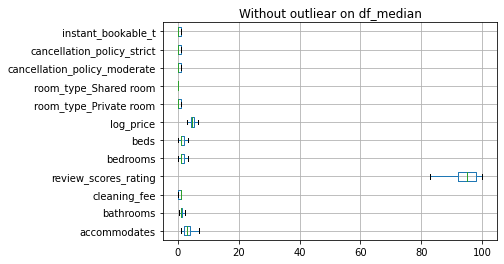

In [57]:
df_med_out.boxplot(vert=0)
plt.title("Without outliear on df_median")
plt.show()

In [79]:
X_med_out=df_med_out.drop("log_price",axis=1)
Y_med_out=df_med_out["log_price"]


X_train,x_test,Y_train,y_test=train_test_split(X_med_out,Y_med_out, test_size=0.2,random_state=1)

LR=LinearRegression()
model3=LR.fit(X_train,Y_train)



round((model3.score(X_train,Y_train))*100,2)

44.83

# Median with outliear 

In [77]:
X_med=df_2.drop("log_price",axis=1)
Y_med=df_2["log_price"]


X_train,x_test,Y_train,y_test=train_test_split(X_med,Y_med, test_size=0.2,random_state=1)

LR=LinearRegression()
model3=LR.fit(X_train,Y_train)



round((model3.score(X_train,Y_train))*100,2)

50.53

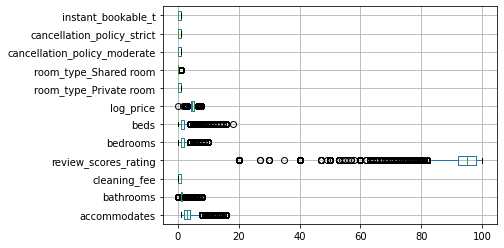

In [98]:
df_2.boxplot(vert=0)
plt.show()

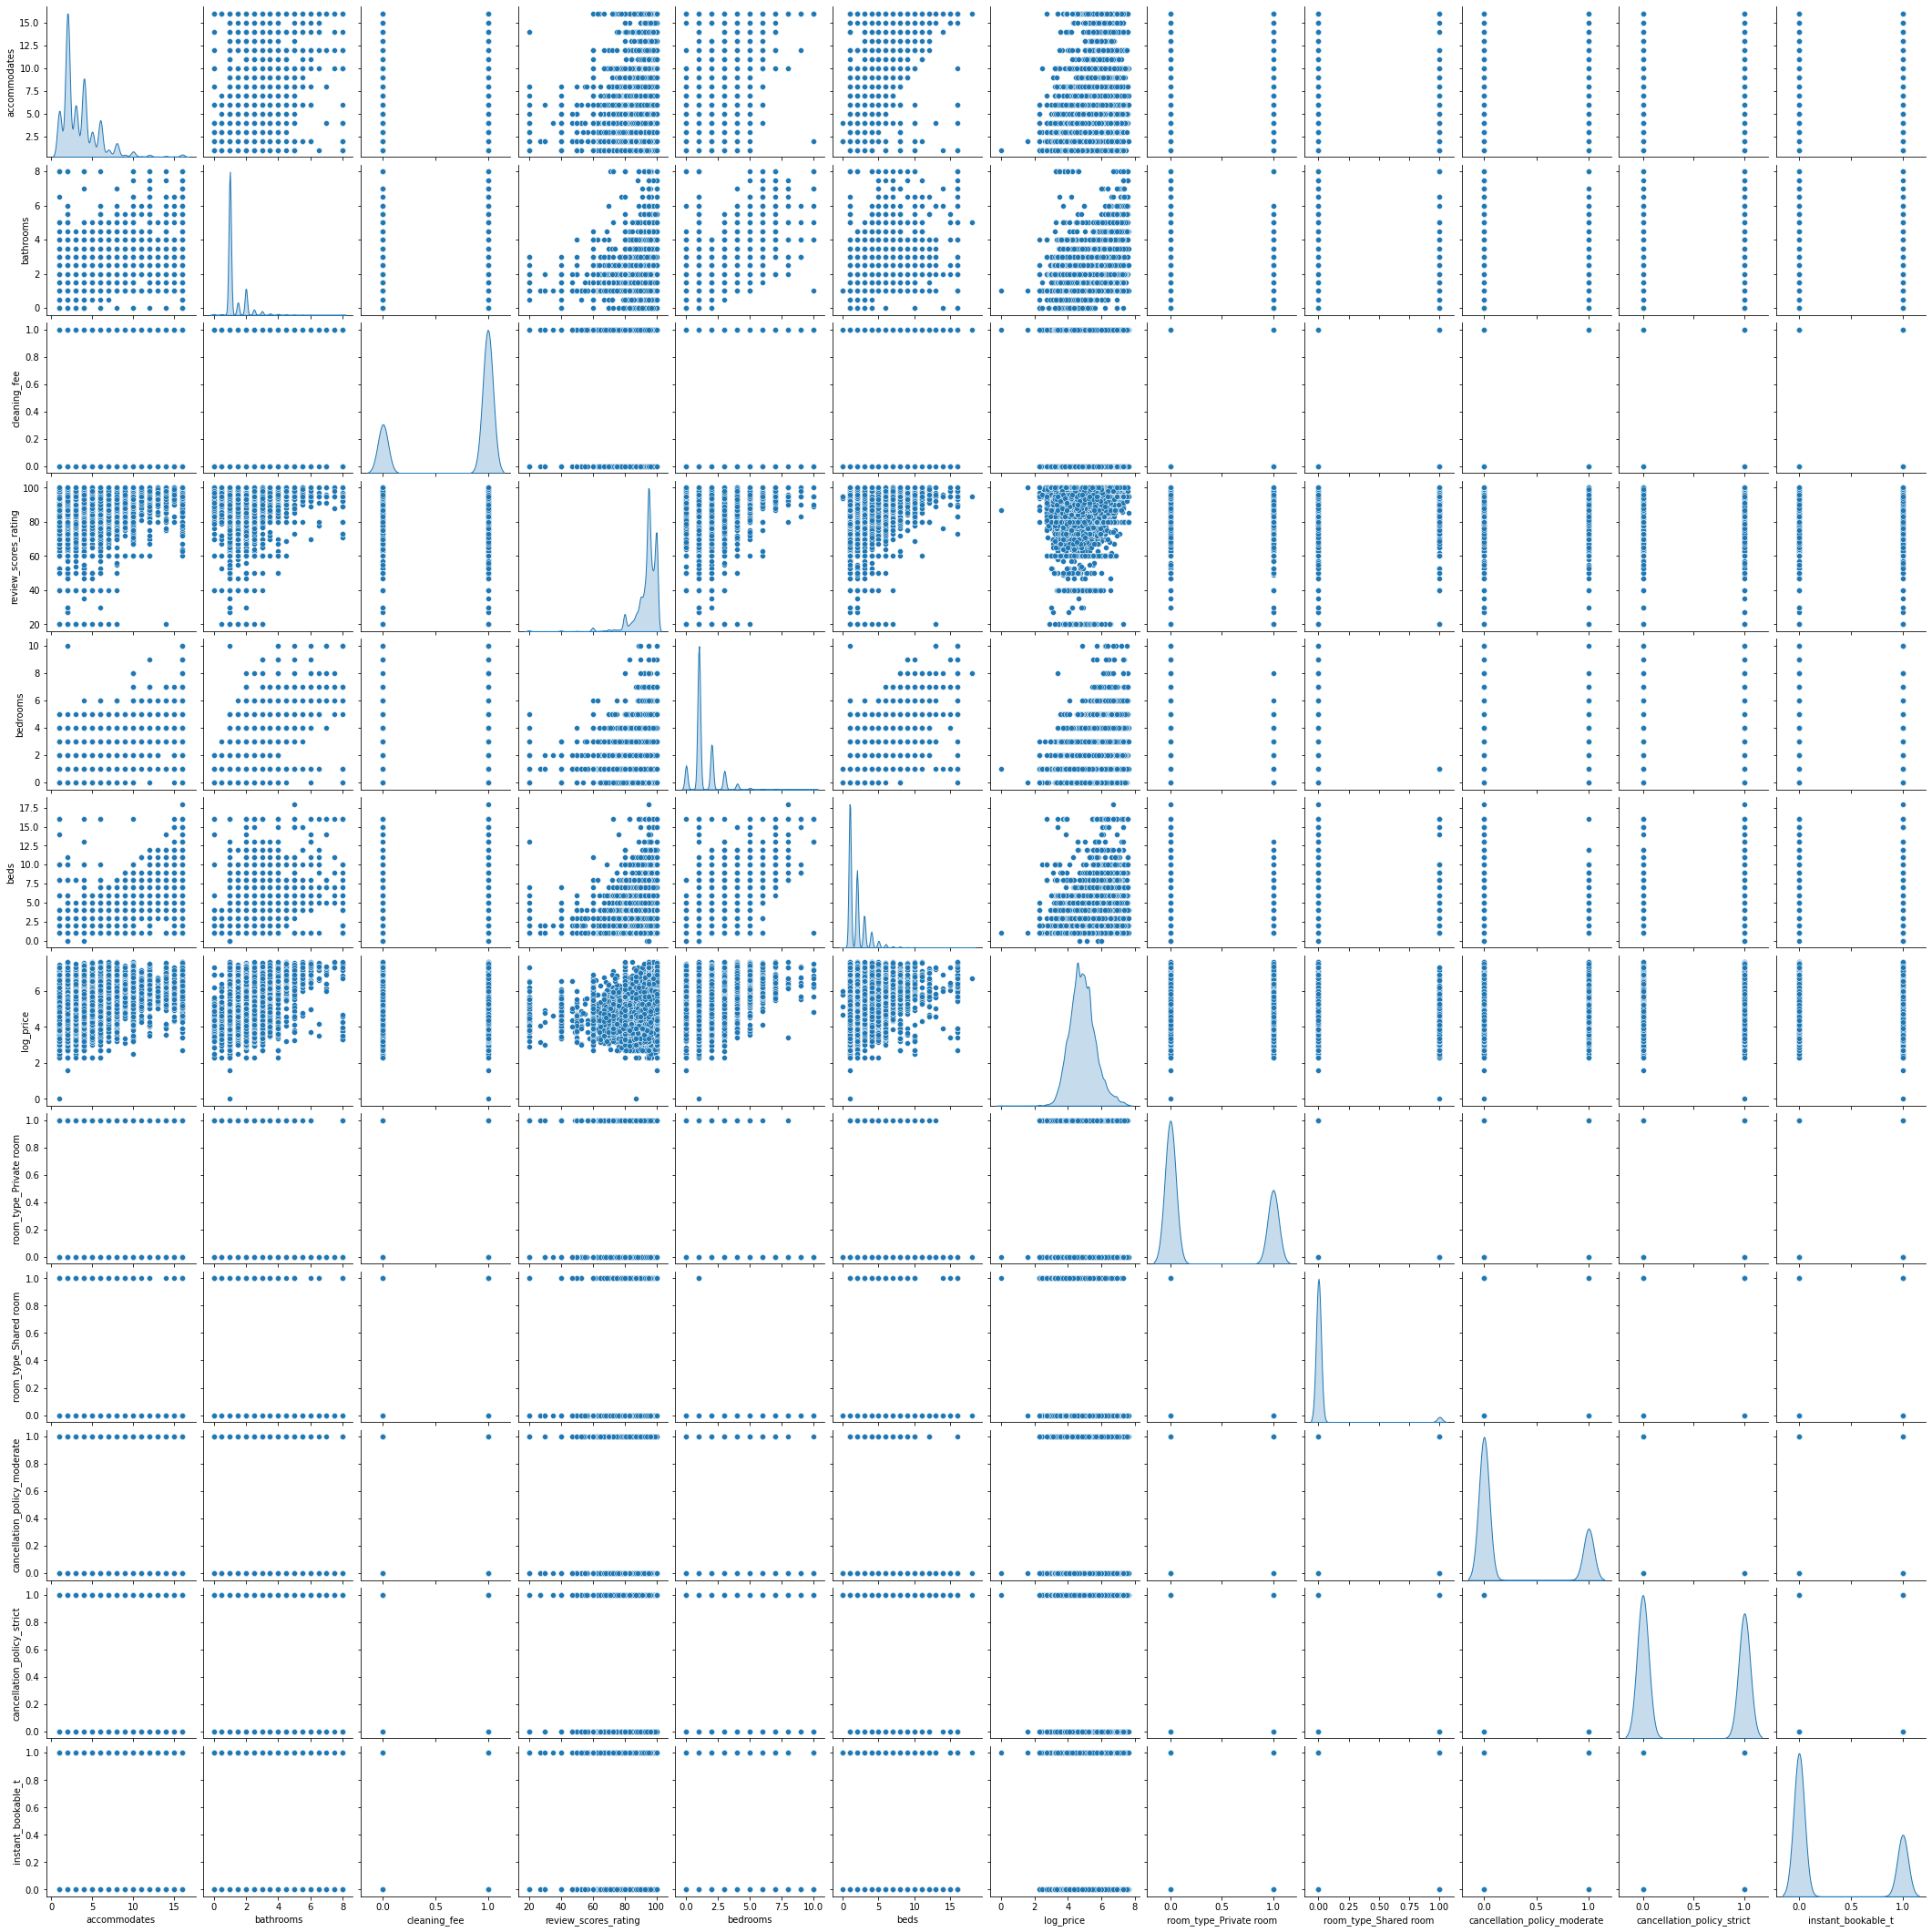

In [99]:
sns.pairplot(df_2,diag_kind='kde')
plt.show()

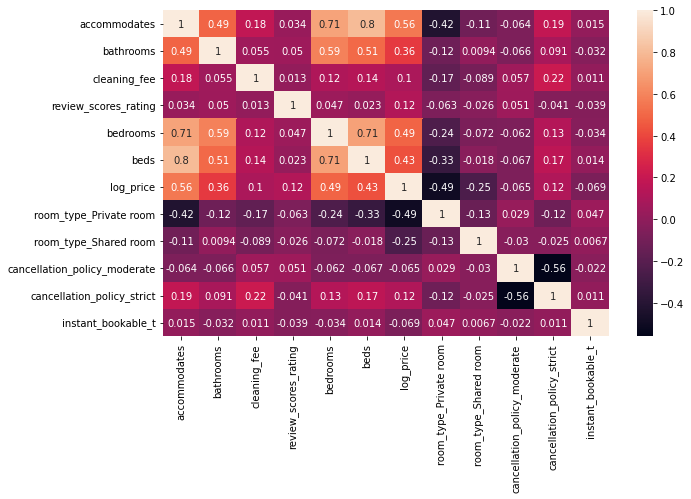

In [100]:
plt.figure(figsize=(10,6))
sns.heatmap(df_2.corr(),annot=True)
plt.show()

# KNN without outliear


In [83]:
# Treating the knn imputate outliear
for column in df_knn_out.columns:  # loop for columns
    lr,ur=remove_outliear(df_knn_out[column])   #function call 
    df_knn_out[column]=np.where(df_knn_out[column]>ur,ur,df_knn_out[column])  # where (condition(where values is ggreater,  if replace, else )
    df_knn_out[column]=np.where(df_knn_out[column]<lr,lr,df_knn_out[column])

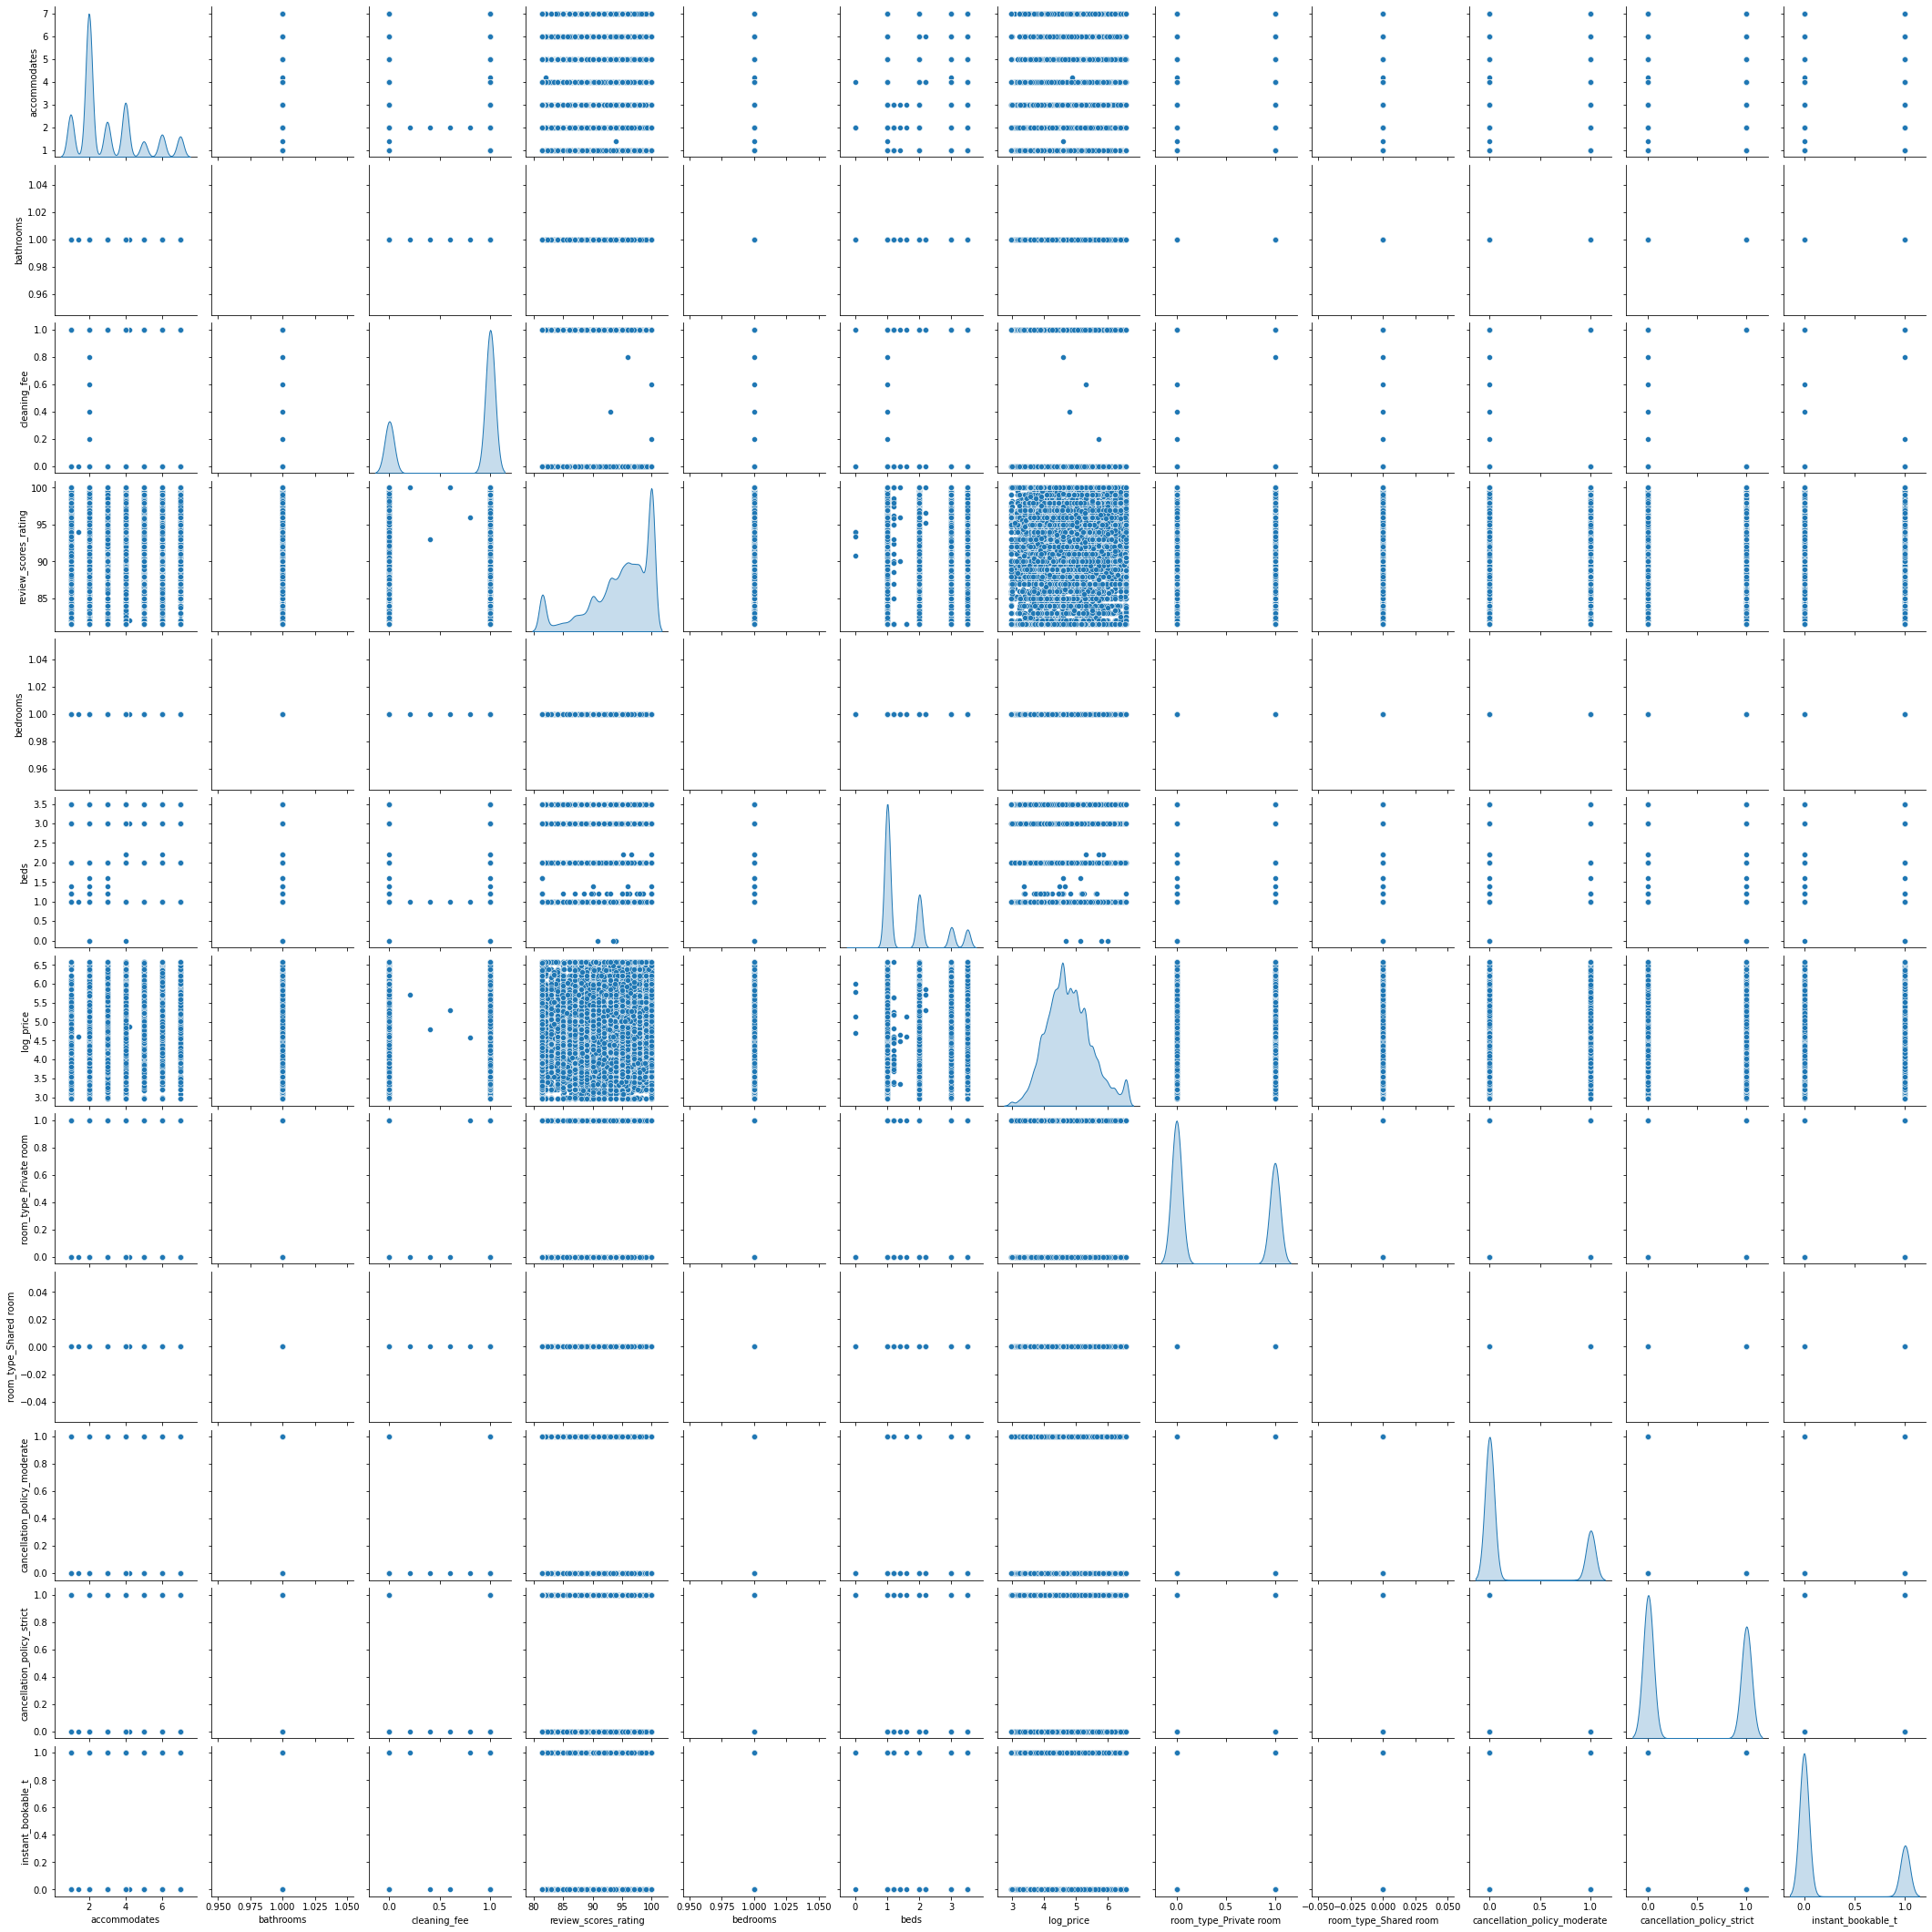

In [101]:
sns.pairplot(df_knn_out,diag_kind='kde')
plt.show()

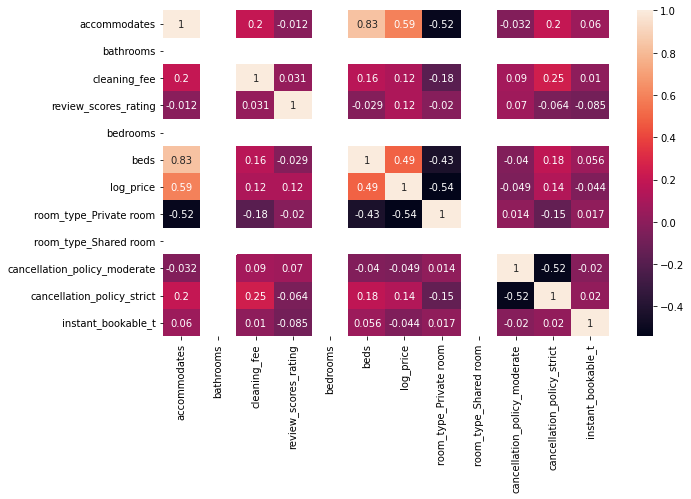

In [102]:
plt.figure(figsize=(10,6))
sns.heatmap(df_knn_out.corr(),annot=True)
plt.show()

In [86]:
X_knn_out=df_knn_out.drop("log_price",axis=1)
Y_knn_out=df_knn_out["log_price"]


X_train,x_test,Y_train,y_test=train_test_split(X_knn_out,Y_knn_out, test_size=0.2,random_state=1)

LR=LinearRegression()
model4=LR.fit(X_train,Y_train)



round((model4.score(X_train,Y_train))*100,2)

44.76

# KNN with Outliear

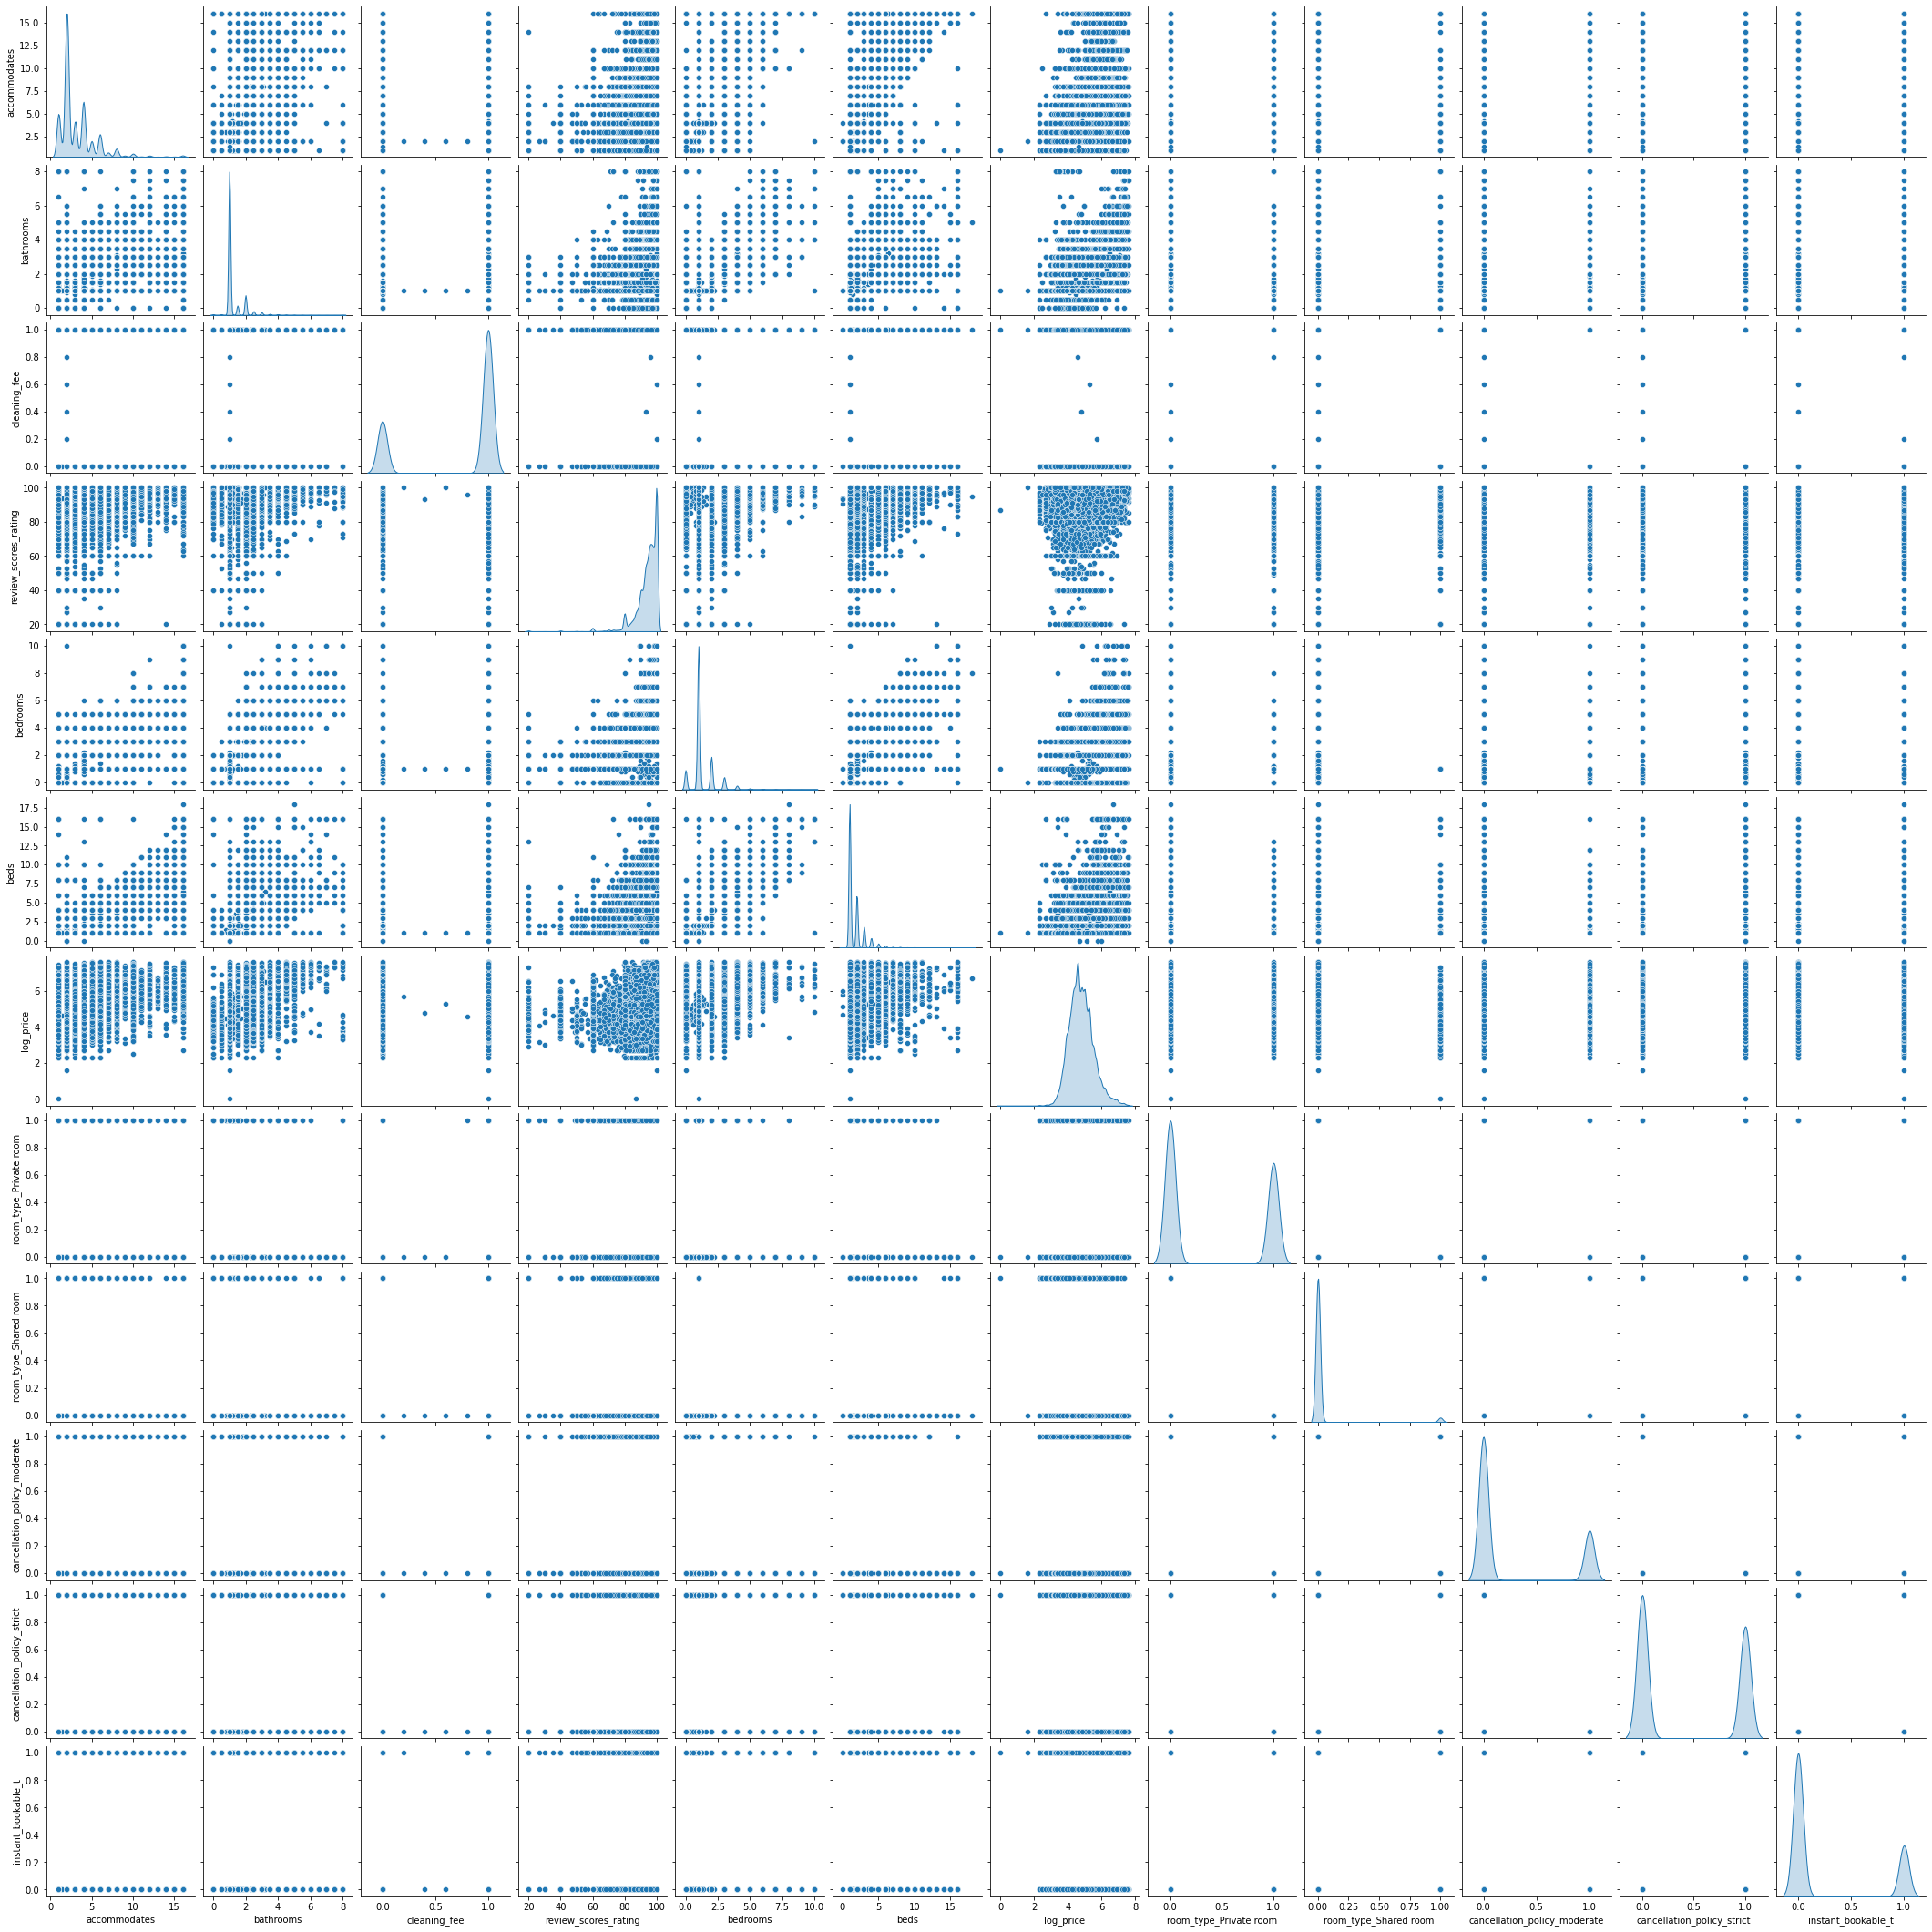

In [104]:
sns.pairplot(df_knn,diag_kind='kde')
plt.show()

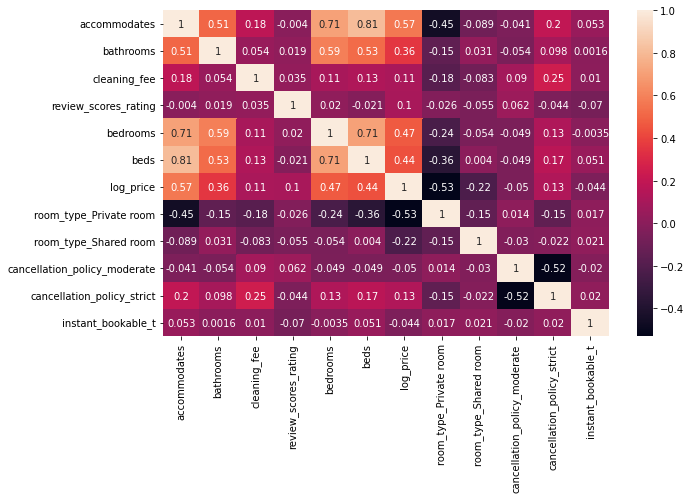

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(df_knn.corr(),annot=True)
plt.show()

In [87]:
X_knn=df_knn.drop("log_price",axis=1)
Y_knn=df_knn["log_price"]


X_train,x_test,Y_train,y_test=train_test_split(X_knn,Y_knn, test_size=0.2,random_state=1)

LR=LinearRegression()
model4=LR.fit(X_train,Y_train)



round((model4.score(X_train,Y_train))*100,2)

51.95

In [111]:
# KNN is performing better  
data_train=pd.concat([X_train,Y_train],axis=1)
data_test=pd.concat([x_test,y_test],axis=1)
data_train.head()

accommodates  bathrooms  cleaning_fee  review_scores_rating  bedrooms  \
13090           4.0        1.0           0.0                 100.0       1.0   
56110           4.0        1.0           0.0                  96.0       1.0   
69196           2.0        1.0           1.0                  94.0       1.0   
42310           2.0        1.5           1.0                  92.0       1.0   
25032           4.0        1.0           1.0                  96.0       1.0   

       beds  room_type_Private room  room_type_Shared room  \
13090   1.0                     0.0                    0.0   
56110   1.0                     0.0                    0.0   
69196   1.0                     0.0                    0.0   
42310   1.0                     0.0                    0.0   
25032   2.0                     0.0                    0.0   

       cancellation_policy_moderate  cancellation_policy_strict  \
13090                           0.0                         1.0   
56110                           0.0                         0.0   
69196                           0.0                         1.0   
42310                           0.0                         1.0   
25032                           1.0                         0.0   

       instant_bookable_t  log_price  
13090                 0.0   5.476464  
56110                 1.0   6.214608  
69196                 0.0   4.595120  
42310                 0.0   5.521461  
25032                 0.0   5.010635

In [120]:
data_train.columns

Index(['accommodates', 'bathrooms', 'cleaning_fee', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'instant_bookable_t', 'log_price'],
      dtype='object')

In [129]:
data_train.rename(columns={'room_type_Private room':'room_type_Private_room','room_type_Shared room':'room_type_Shared_room'},inplace=True)

In [130]:
expr='log_price ~ accommodates + bathrooms +cleaning_fee + review_scores_rating + bedrooms + beds + room_type_Private_room + room_type_Shared_room + cancellation_policy_moderate + cancellation_policy_strict + instant_bookable_t'

In [132]:
import statsmodels.formula.api as smf
model=smf.ols(formula=expr,data=data_train).fit()
model.params

Intercept                       3.943302
accommodates                    0.079712
bathrooms                       0.145201
cleaning_fee                   -0.072648
review_scores_rating            0.007293
bedrooms                        0.151185
beds                           -0.050967
room_type_Private_room         -0.639292
room_type_Shared_room          -1.095481
cancellation_policy_moderate   -0.059880
cancellation_policy_strict     -0.010260
instant_bookable_t             -0.053678
dtype: float64

In [133]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     5827.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:52:20   Log-Likelihood:                -42625.
No. Observations:               59288   AIC:                         8.527e+04
Df Residuals:                   59276   BIC:                         8.538e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.9433      0.028    141.790      0.000       3.889       3.998
accommodates                     0.0797      0.002     42.909      0.000       0.076       0.083
bathrooms                        0.1452      0.005     32.266      0.000       0.136       0.154
cleaning_fee                    -0.0726      0.005    -14.458      0.000      -0.082      -0.063
review_scores_rating             0.0073      0.000     25.568      0.000       0.007       0.008
bedrooms                         0.1512      0.004     39.290      0.000       0.144       0.159
beds                            -0.0510      0.003    -17.005      0.000      -0.057      -0.045
room_type_Private_room          -0.6393      0.005   -130.910      0.000      -0.649      -0.630
room_type_Shared_room           -1.0955      0.013    -86.257      0.000      -1.120      -1.071
cancellation_policy_moderate    -0.0599      0.006    -10.532      0.000      -0.071      -0.049
cancellation_policy_strict      -0.0103      0.005     -1.972      0.049      -0.020   -6.22e-05
instant_bookable_t              -0.0537      0.005    -11.501      0.000      -0.063      -0.045
==============================================================================
Omnibus:                     6775.735   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17977.784
Skew:                           0.647   Prob(JB):                         0.00
Kurtosis:                       5.367   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""